In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:

class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None

    def transform_features(self, X):

        X_poly = np.hstack([X**i for i in range(1, self.degree + 1)])
        X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
        return X_poly

    def fit(self, X, y):

        X_poly = self.transform_features(X)
        self.coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):

        X_poly = self.transform_features(X)
        return X_poly @ self.coefficients

    def plot(self, X, y, X_pred):
        plt.scatter(X, y, color='blue', label='Actual data')
        plt.plot(X, X_pred, color='red', label='Polynomial regression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()

    def mean_squared_error(self, y, y_pred):

        return np.mean((y - y_pred) ** 2)



In [16]:
def generate_data(n=50, noise=5.0):

    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y


In [17]:
X, y = generate_data(n=50, noise=5.0)


In [18]:
degree = 7


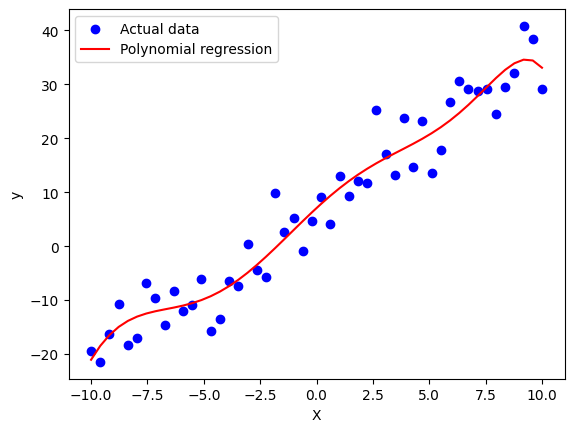

Mean Squared Error: 17.57547894296494
Coefficients (weights):
[ 7.06325913e+00  3.85845994e+00 -2.06855864e-01 -4.75610855e-02
  6.86990744e-03  6.91245479e-04 -4.90646698e-05 -3.30714639e-06]


In [19]:
model = PolynomialRegression(degree)
model.fit(X.reshape(-1, 1), y)

y_pred = model.predict(X.reshape(-1, 1))

model.plot(X, y, y_pred)

mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

print("Coefficients (weights):")
print(model.coefficients)
